<a href="https://colab.research.google.com/github/alteush/Deep-Learning-2024/blob/main/Credit_Card_Deep_Learning_Project_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
import sys
your_drive_path_to_src_file = "/content/drive/MyDrive/Statistics Masters/Adv. computational learning and data analysis/Project/Data/"
sys.path.append(your_drive_path_to_src_file)

In [71]:
# original path
# df = pd.read_csv("CSV/creditcard.csv")
df = pd.read_csv("/content/drive/MyDrive/Statistics Masters/Adv. computational learning and data analysis/Project/Data/creditcard.csv")

In [72]:
df.shape

(284807, 31)

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [75]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [76]:
# class = 1 --> Fraud
#class = 0 --> Not Fraud

#Gives count of positive and negative labels
np.bincount(df['Class'])

array([284315,    492])

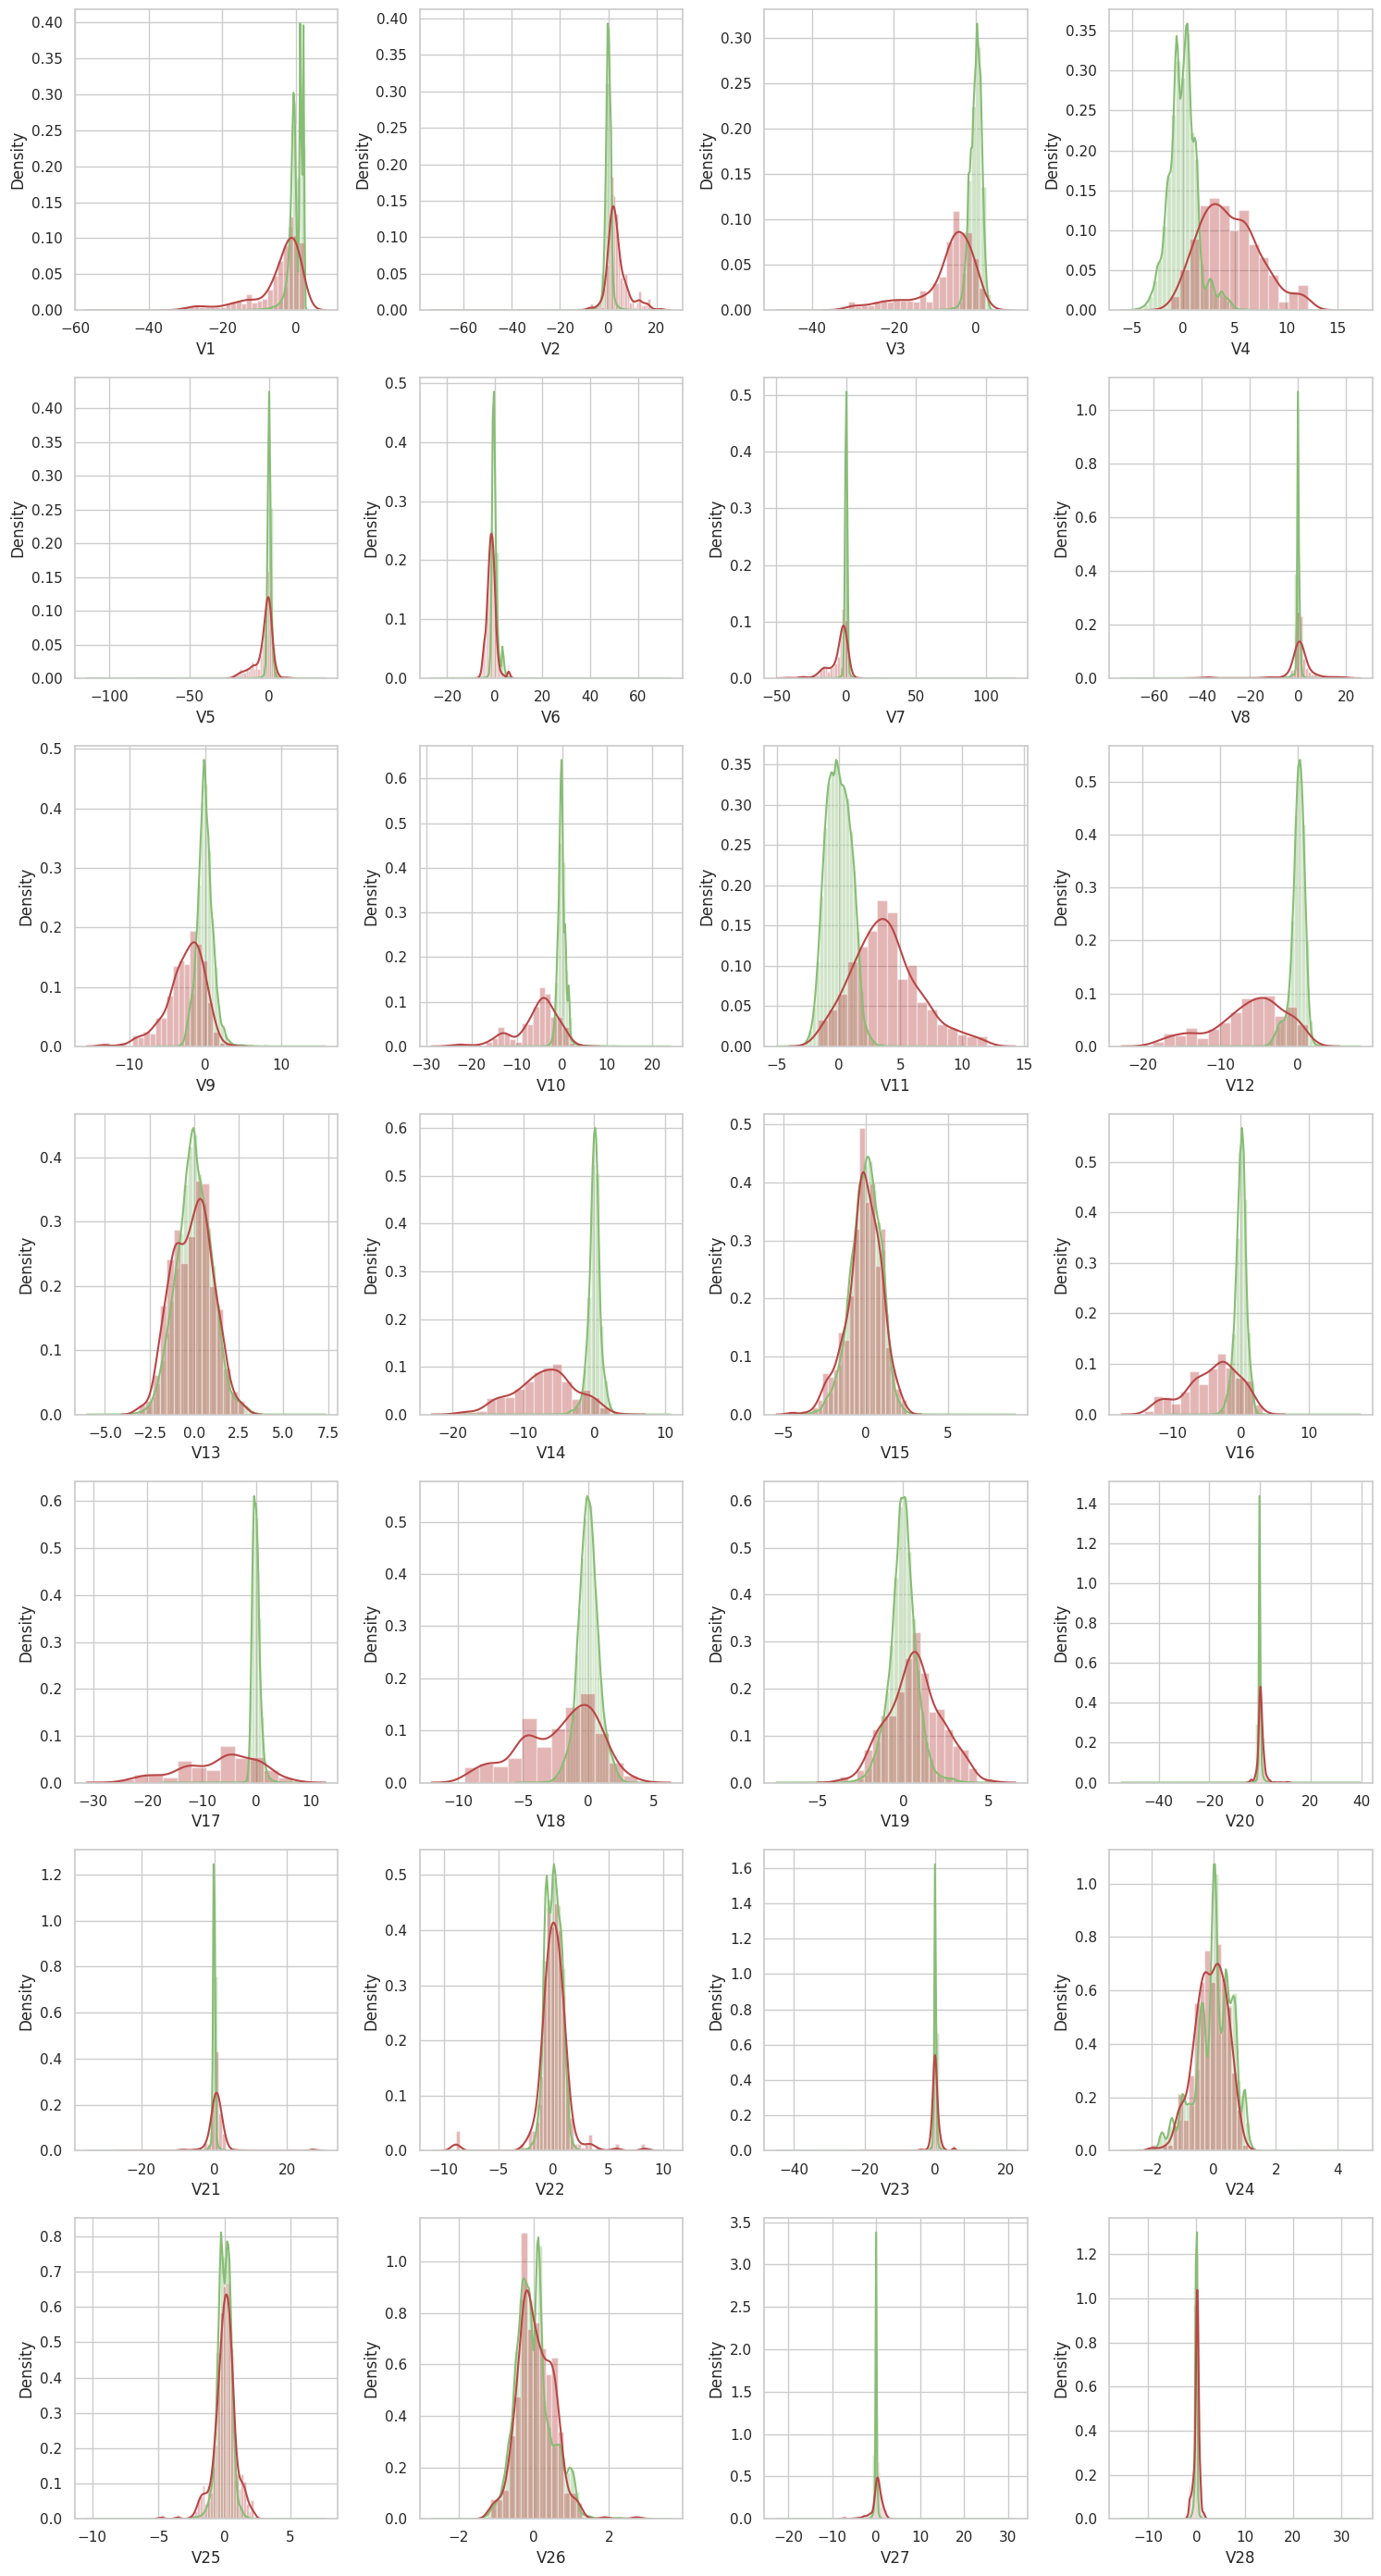

In [77]:
cols = df.columns.drop(['Time', 'Amount', 'Class'])

f, ax = plt.subplots(7, 4, figsize = (15, 28))

for i, c in zip(ax.flatten(), cols):
    sns.distplot(df[c][df['Class'] == 0], color = '#87bd75', ax = i)
    sns.distplot(df[c][df['Class'] == 1], color = '#b94646', ax = i)
f.tight_layout()

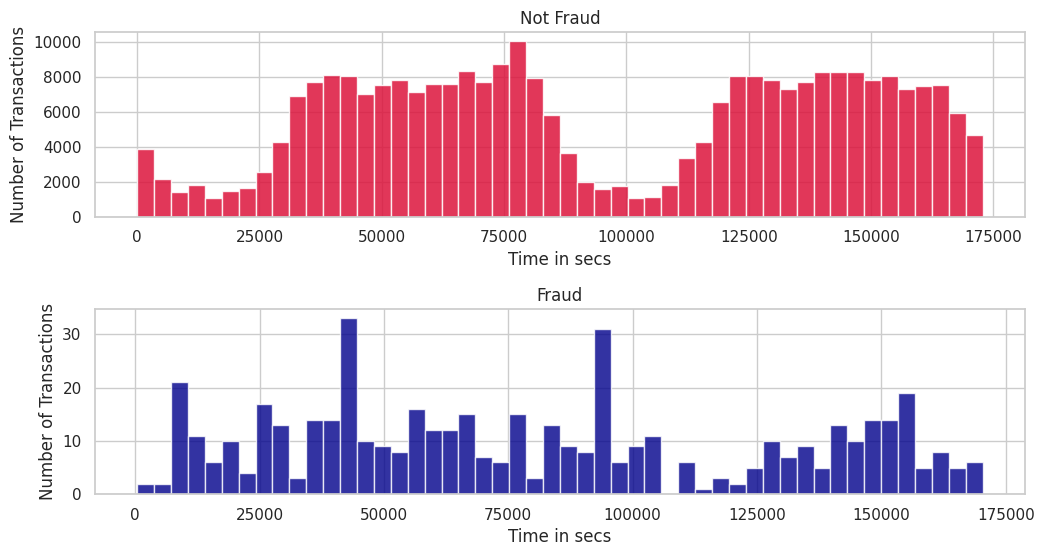

In [78]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Time'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)

ax1.set_xlabel('Time in secs')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Time"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)

ax2.set_xlabel('Time in secs')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

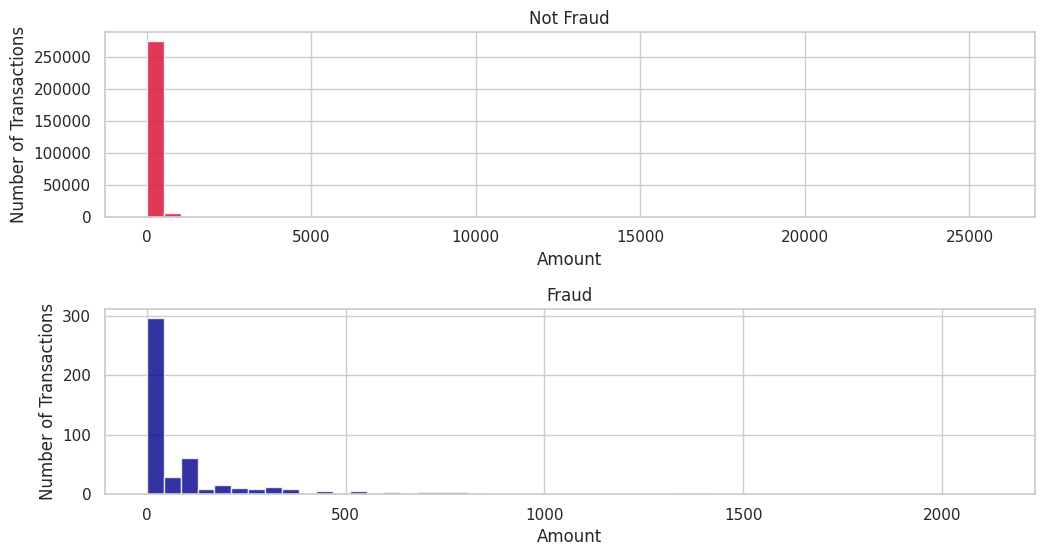

In [79]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Amount'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)
ax1.set_xlabel('Amount')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Amount"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)
ax2.set_xlabel('Amount')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

In [80]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [81]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [82]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

In [84]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [85]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(y_valid) * 100))

Percentage of FRAUD instances in Training Set : 0.17281485220215498
Percentage of FRAUD instances in Testing Set : 0.17204452090867595
Percentage of FRAUD instances in Validation set : 0.1733634707805745


In [86]:
X_train.shape

(182276, 29)

### Oversampling

In [87]:
def oversampling(X_train, y_train):
# Oversampling the imbalanced dataset
    oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
    X, y = oversample.fit_resample(X_train, y_train)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X, y
    # scatter plot of examples by class label


In [88]:
X_train, y_train = oversampling(X_train, y_train)

Counter({0: 181961, 1: 72784})


Now, it's fairly balanced data

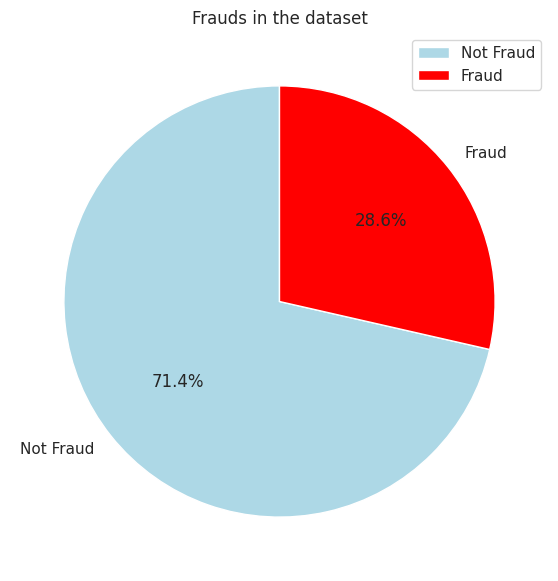

In [89]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = y_train.value_counts()

colors = ["lightblue","red"]


plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

### Adding Gaussian Noise

In [90]:
#Adding Gaussian Noise

def add_noise(X_train):
    mean = 0
    sigma = 0.1
    noise = np.random.normal(mean, sigma ,X_train.shape)
    X_train = X_train + noise
    return X_train

In [91]:
X_train_noised = add_noise(X_train)

In [92]:
y_train = np.array(y_train).reshape(-1, 1)
y_valid = np.array(y_valid).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [93]:
#from keras.utils import np_utils

#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#y_valid = np_utils.to_categorical(y_valid)

# Instead of:
# from keras.utils import np_utils
# y_train = np_utils.to_categorical(y_train)

# Use:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_valid = keras.utils.to_categorical(y_valid)

### Autoencoder Model

In [94]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [95]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')


history = autoencoder.fit(X_train_noised, X_train_noised,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_valid, X_valid),
                    verbose=1).history

Epoch 1/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6205 - loss: 7.0995 - val_accuracy: 0.7690 - val_loss: 0.6657
Epoch 2/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8080 - loss: 6.8050 - val_accuracy: 0.5896 - val_loss: 0.6941
Epoch 3/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6755 - loss: 6.8088 - val_accuracy: 0.5934 - val_loss: 0.6898
Epoch 4/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6899 - loss: 6.8280 - val_accuracy: 0.8034 - val_loss: 0.6468
Epoch 5/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8269 - loss: 6.8056 - val_accuracy: 0.7676 - val_loss: 0.6523
Epoch 6/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8342 - loss: 6.7703 - val_accuracy: 0.8208 - val_loss: 0.6406
Epoch 7/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8398 - loss: 6.7026 - val_accuracy: 0.8223 - val_loss: 0.6406
Epoch 8/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8450 - loss: 6.7263

In [96]:
denoised_data = autoencoder.predict(X_train_noised)

7961/7961 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


# Fraud Detector Model (Baseline)

In [97]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [98]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(denoised_data, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9048 - loss: 0.3879 - val_accuracy: 0.9022 - val_loss: 0.2717
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9582 - loss: 0.1167 - val_accuracy: 0.9063 - val_loss: 0.2578
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9617 - loss: 0.1021 - val_accuracy: 0.9157 - val_loss: 0.2362
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9647 - loss: 0.0938 - val_accuracy: 0.9153 - val_loss: 0.2360
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9687 - loss: 0.0852 - val_accuracy: 0.9108 - val_loss: 0.2443
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9725 - loss: 0.0773 - val_accuracy: 0.9026 - val_loss: 0.2665
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9752 - loss: 0.0706 - val_accuracy: 0.8928 - val_loss: 0.2981
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0626 - val_accuracy: 0.

## Model Evaluation

In [99]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [100]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9174 - loss: 0.2393


[0.2403082251548767, 0.9155753254890442]

In [101]:
baseline_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


#### ROC-AUC Curve

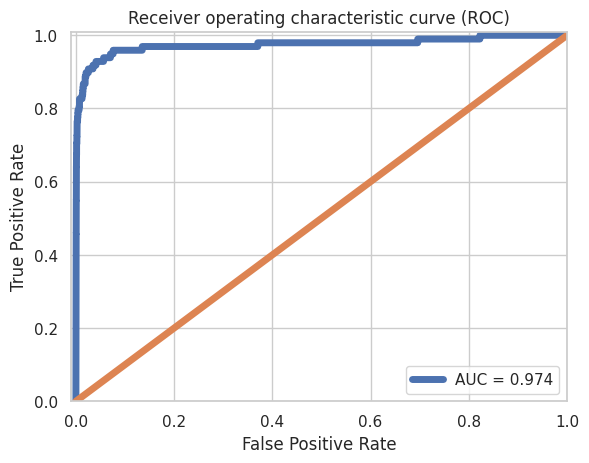

In [102]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), baseline_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [103]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), baseline_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  92.85714285714286 %


#### PR-AUC Curve

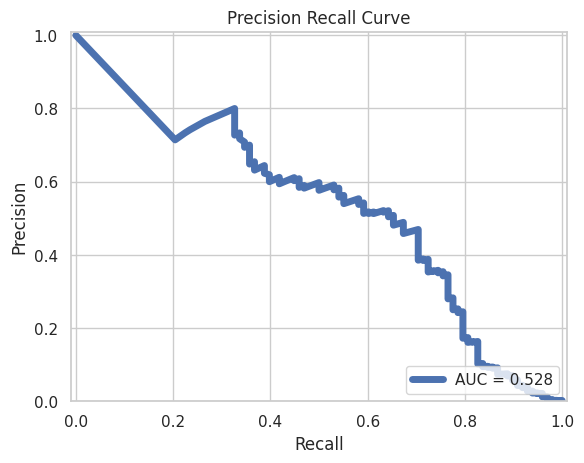

In [104]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), baseline_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Measuring the Effect of Denoising Autoencoder

In this section we will train the model on X_train, instead of denoised_data, and see the difference in perforemance between the models

In [105]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [106]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9744 - loss: 0.0928 - val_accuracy: 0.9910 - val_loss: 0.0230
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9949 - val_loss: 0.0152
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9968 - val_loss: 0.0102
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9964 - val_loss: 0.0113
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9969 - loss: 0.0126 - val_accuracy: 0.9956 - val_loss: 0.0137
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9972 - loss: 0.0108 - val_accuracy: 0.9965 - val_loss: 0.0115
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9975 - loss: 0.0103 - val_accuracy: 0.9971 - val_loss: 0.0104
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.

In [107]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [108]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0060


[0.006785196252167225, 0.9983848929405212]

In [109]:
no_noise_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


## Model Evaluation

#### ROC-AUC Curve

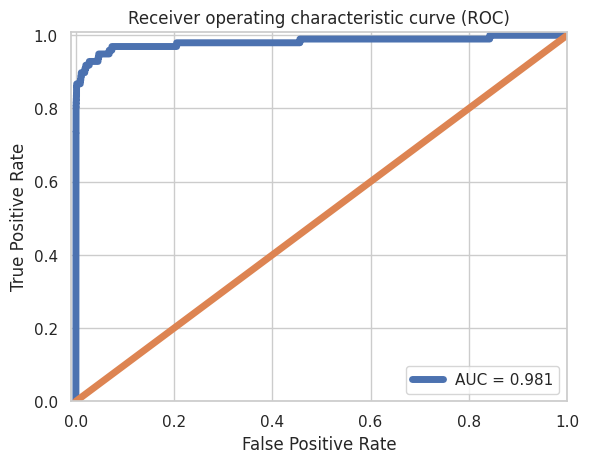

In [110]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), no_noise_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [111]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), no_noise_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  84.6938775510204 %


#### PR-AUC Curve

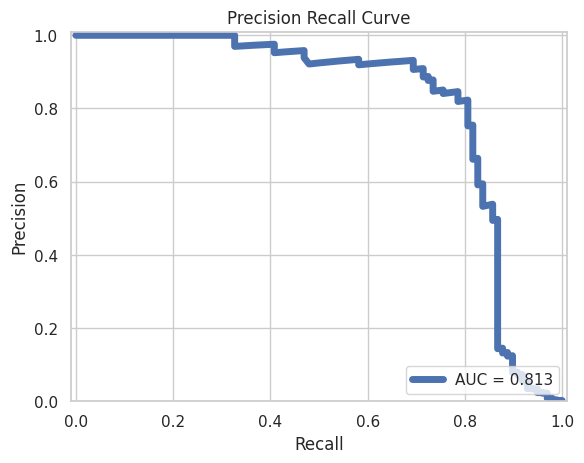

In [112]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), no_noise_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Applying PR AUC instead of Accuracy

The PR AUC was calculated with code taken from here:

https://www.kaggle.com/code/nyk510/using-pr-auc-metrics-in-keras

In [113]:
from tensorflow.keras.metrics import AUC
pr_metric = AUC(curve='PR', num_thresholds=1000) # The higher the threshold value, the more accurate it is calculated.

import tensorflow as tf
from sklearn.metrics import average_precision_score

def sk_pr_auc(y_true, y_pred):
    return tf.py_function(average_precision_score, (y_true, y_pred), tf.float64)

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[
                  pr_metric,
                  sk_pr_auc
              ])

In [114]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [115]:
fraud_dtr.compile(metrics=[pr_metric],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - auc_1: 0.9520 - loss: 0.2933 - val_auc_1: 0.9992 - val_loss: 0.0483
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc_1: 0.9963 - loss: 0.0791 - val_auc_1: 0.9993 - val_loss: 0.0360
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc_1: 0.9975 - loss: 0.0627 - val_auc_1: 0.9994 - val_loss: 0.0302
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc_1: 0.9984 - loss: 0.0507 - val_auc_1: 0.9995 - val_loss: 0.0265
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc_1: 0.9989 - loss: 0.0416 - val_auc_1: 0.9996 - val_loss: 0.0203
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc_1: 0.9992 - loss: 0.0355 - val_auc_1: 0.9996 - val_loss: 0.0197
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc_1: 0.9994 - loss: 0.0305 - val_auc_1: 0.9995 - val_loss: 0.0203
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc_1: 0.9995 - loss: 0.0269 - val_auc_1: 0.9996 - val_loss: 0.0182
Epoch 9/25
996/996 ━━━━━

## Model Evaluation

In [116]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [117]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - auc_1: 0.9997 - loss: 0.0059


[0.00679415836930275, 0.9996703863143921]

In [118]:
pr_auc_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


#### ROC-AUC Curve

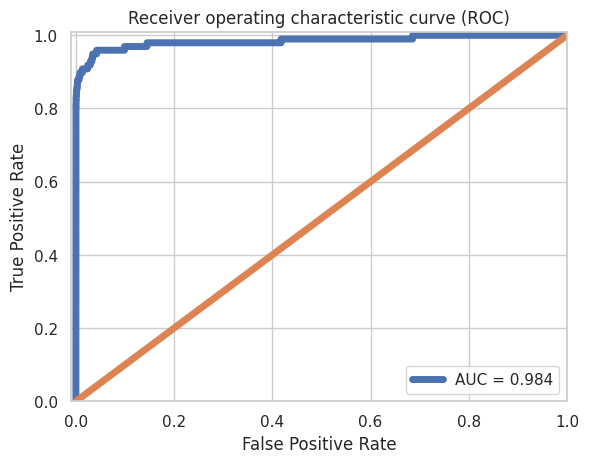

In [119]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), pr_auc_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [120]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), pr_auc_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  84.6938775510204 %


#### PR-AUC Curve

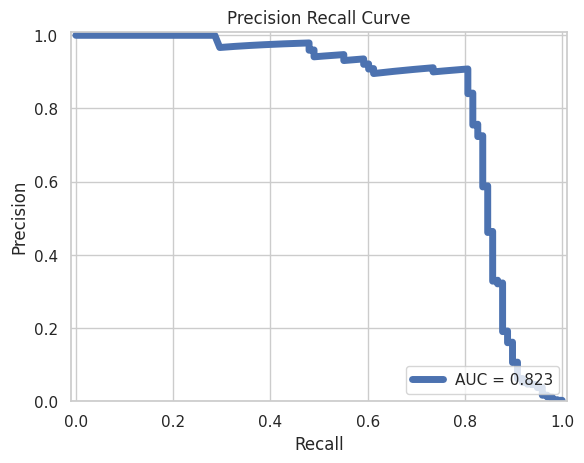

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), pr_auc_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# Improved Fraud detector

In [122]:
from tensorflow.keras import regularizers

input_layer = keras.layers.Input(shape=(input_shape,))
layer_1 = keras.layers.Dense(128, activation="relu",
                             kernel_initializer='he_normal')(input_layer)
drop_1 = keras.layers.Dropout(0.2)(layer_1)

layer_2 = keras.layers.Dense(64, activation="relu",
                             kernel_initializer='he_normal')(drop_1)
drop_2 = keras.layers.Dropout(0.2)(layer_2)

layer_3 = keras.layers.Dense(32, activation='relu',
                             kernel_initializer='he_normal')(drop_2)
layer_4 = keras.layers.Dense(16, activation='relu',
                             kernel_initializer='he_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation='sigmoid')(layer_4)

fraud_dtr = keras.Model(inputs=input_layer, outputs=output_layer)


In [123]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

fraud_dtr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = fraud_dtr.fit(X_train_noised, y_train, epochs=25, batch_size=256,
              validation_split=0.2, callbacks=[early_stop, reduce_lr],validation_data = (X_valid, y_valid)).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9390 - loss: 0.1514 - val_accuracy: 0.9935 - val_loss: 0.0185 - learning_rate: 0.0010
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0283 - val_accuracy: 0.9959 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9974 - val_loss: 0.0111 - learning_rate: 0.0010
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9980 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.9984 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9986 - val_loss: 0.0095 - learning_rate: 0.0010
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0065 - 

In [124]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

#callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.h5',
#                                          save_best_only = True)
callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(X_train_noised, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9984 - val_loss: 0.0096
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9984 - val_loss: 0.0095
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0066 - val_accuracy: 0.9985 - val_loss: 0.0095
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9985 - val_loss: 0.0096
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.9985 - val_loss: 0.0096
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9985 - val_loss: 0.0096
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9986 - val_loss: 0.0096
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.

In [125]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [126]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9985 - loss: 0.0075


[0.00796432513743639, 0.9983848929405212]

In [127]:
trans_preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


## Model Evaluation

#### ROC-AUC Curve

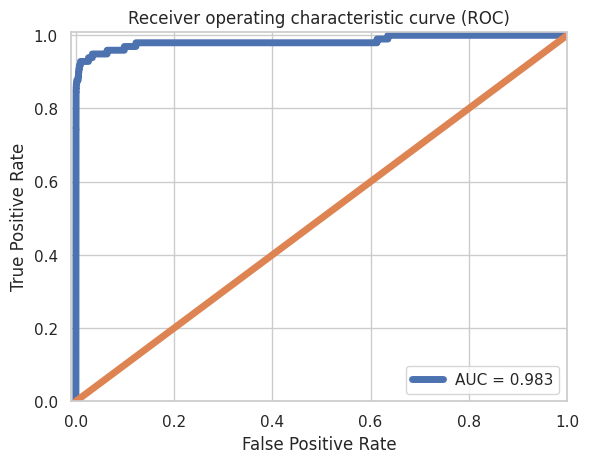

In [128]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), trans_preds[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Recall

In [129]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), trans_preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  86.73469387755102 %


#### PR-AUC Curve

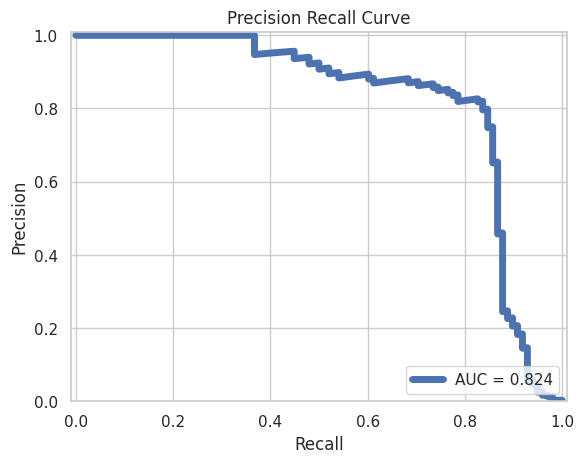

In [130]:
precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis = 1), trans_preds[:,1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, linewidth = 5, label = 'AUC = %0.3f'% pr_auc)

plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


# All Models Put Together

## PR AUC

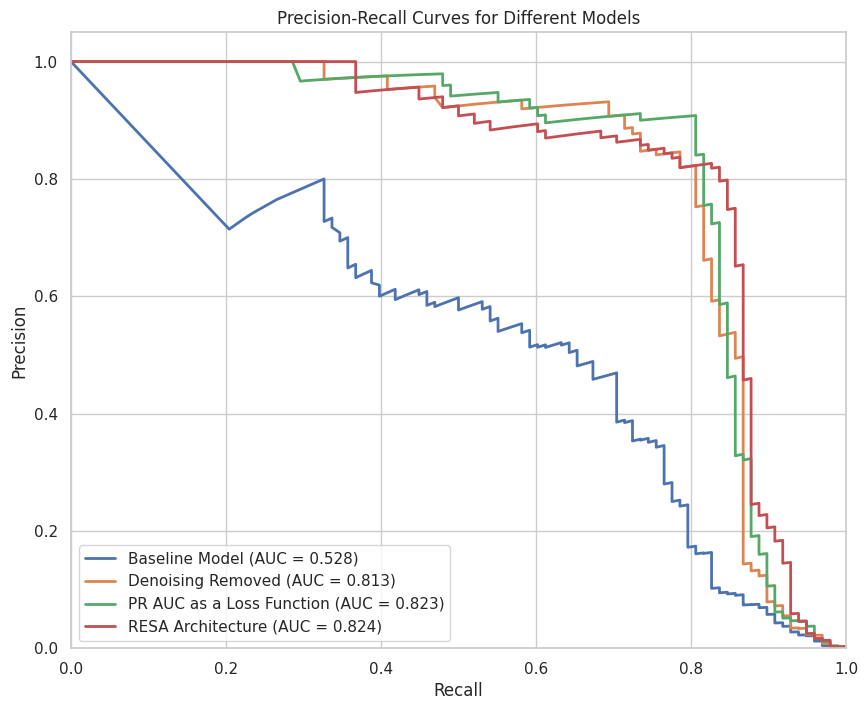

In [131]:
models = {
    'Baseline Model': baseline_preds,
    'Denoising Removed': no_noise_preds,
    'PR AUC as a Loss Function': pr_auc_preds,
    'RESA Architecture': trans_preds
}


plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    precision, recall, thresholds = precision_recall_curve(y_test.argmax(axis=1), predictions[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## ROC AUC

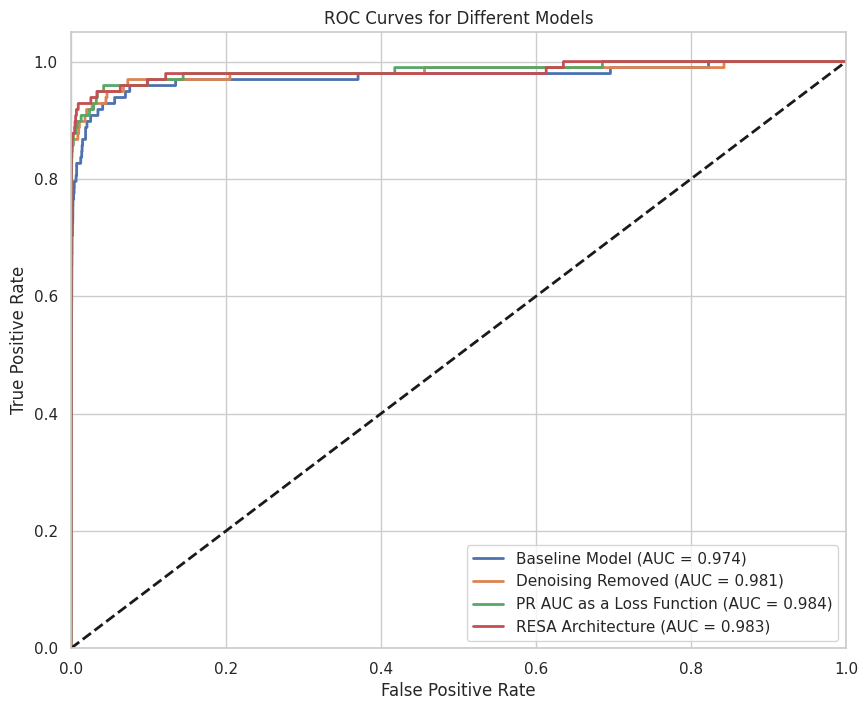

In [132]:
# Assuming baseline_preds, no_noise_preds, pr_auc_preds, and trans_preds are already defined from previous code blocks.
# And y_test is available.

models = {
    'Baseline Model': baseline_preds,
    'Denoising Removed': no_noise_preds,
    'PR AUC as a Loss Function': pr_auc_preds,
    'RESA Architecture': trans_preds
}

plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
